In [1]:
conda install -c menpo opencv

^C

Note: you may need to restart the kernel to use updated packages.


In [12]:
import cv2
import numpy as np
import pickle
import cv2
import os
from os import listdir
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
#from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.utils import np_utils
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import pickle
import random
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [2]:
def CalcFeatures(img):
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return des

In [3]:
default_image_size = tuple((128, 128))
## Function to convert image to array of 348 X 348
def convert_image_to_array(image_dir):
    '''
    train_datagen = ImageDataGenerator(rotation_range=5,  # rotation
                                   width_shift_range=0.2,  # horizontal shift
                                   zoom_range=0.2,  # zoom
                                   horizontal_flip=True,  # horizontal flip
                                   brightness_range=[0.2,0.8])  # brightness
    '''
    try:
        image = cv2.imread(image_dir)
        img_des = CalcFeatures(image)
        if img_des is not None :
            return img_des
        else :
            return np.array()
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
features = []
e_lables = pd.read_csv("GroceryStoreDataset-master2/dataset/classes.csv")
#print(e_lables)

x_train, y_train = [], []
data = []

totalImage = 0  # it is used to control total number of images for each class

# root_dir = listdir("GroceryStoreDataset-master/dataset/train") # Specify location of plant images

# for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    
    
image_list = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit")
#     print(image_list)

for image in image_list:

    image_sub_cat = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}")
#         print(image_sub_cat)

    for image_sub_cat_name in image_sub_cat:

#             print(image_sub_cat_name)
        path  = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}"

        if os.path.isdir(path):  
            image_sub_cat_name_jpg = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}")

#                 print(image_sub_cat_name_jpg)

            for image_name in image_sub_cat_name_jpg:
#                     print(image_sub_cat_name)

#                     print(label_list.append(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]))
                y_label = e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]
                y_train.append(y_label)
                if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                    image_full_path = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}/{image_name}"
                    x_img_des = convert_image_to_array(image_full_path)
                    features.append(x_img_des)
#                     x_train.append(x_img)
#                     data.append([x_img, y_label])

        if os.path.isfile(path):
            #print(image_sub_cat_name)
            y_label = e_lables.loc[e_lables['Class'] == image].Class_ID.iloc[0]
            y_train.append(y_label)

            if image_sub_cat_name.endswith(".jpg") == True or image_sub_cat_name.endswith(".JPG") == True:
                    image_full_path = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}"
                    x_img_des = convert_image_to_array(image_full_path)
                    features.append(x_img_des)
#                     x_train.append(x_img)
#                     data.append([x_img, y_label])

    '''
    image_name = f"PlantVillage/{image_folder}/"+image
    if isinstance(image_name, str) == True:
        if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
            image_list_a.append(convert_image_to_array(image_name))
            label_list.append(image_folder)
    totalImage = totalImage+1
    if(totalImage>=20):          
        break
   '''   
features = np.vstack(features)

# Convert images_list_a and lable_list to numpy array
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
print(len(features))


1826662


In [5]:
k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels, centres = cv2.kmeans(features, k, None, criteria, 10, flags)

In [6]:
print(len(features))

1826662


In [7]:
def bag_of_features(features, centres, k = 500):
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec


In [9]:
# features = []
# labels = []
vec = []
e_lables = pd.read_csv("GroceryStoreDataset-master2/dataset/classes.csv")
#print(e_lables)

x_train, y_train = [], []
data = []

totalImage = 0  # it is used to control total number of images for each class

# root_dir = listdir("GroceryStoreDataset-master/dataset/train") # Specify location of plant images

# for image_folder in root_dir :  # Look for each folder
    # Look for All images in each folder
    
    
image_list = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit")
#     print(image_list)

for image in image_list:

    image_sub_cat = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}")
#         print(image_sub_cat)

    for image_sub_cat_name in image_sub_cat:

#             print(image_sub_cat_name)
        path  = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}"

        if os.path.isdir(path):  
            image_sub_cat_name_jpg = listdir(f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}")

#                 print(image_sub_cat_name_jpg)

            for image_name in image_sub_cat_name_jpg:
#                     print(image_sub_cat_name)

#                     print(label_list.append(e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]))
                y_label = e_lables.loc[e_lables['Class'] == image_sub_cat_name].Class_ID.iloc[0]
                y_train.append(y_label)
                if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
                    image_full_path = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}/{image_name}"
                    x_img_des = convert_image_to_array(image_full_path)
                    img_vec = bag_of_features(x_img_des, centres, k)
                    vec.append(img_vec)
#                     labels.append(int(file[28]))
#                     features.append(x_img_des)
#                     x_train.append(x_img)
#                     data.append([x_img, y_label])

        if os.path.isfile(path):
            #print(image_sub_cat_name)
            y_label = e_lables.loc[e_lables['Class'] == image].Class_ID.iloc[0]
            y_train.append(y_label)

            if image_sub_cat_name.endswith(".jpg") == True or image_sub_cat_name.endswith(".JPG") == True:
                    image_full_path = f"GroceryStoreDataset-master2/dataset/train/Fruit/{image}/{image_sub_cat_name}"
                    x_img_des = convert_image_to_array(image_full_path)
                    img_vec = bag_of_features(x_img_des, centres, k)
                    vec.append(img_vec)
#                     labels.append(int(file[28]))
#                     x_train.append(x_img)
#                     data.append([x_img, y_label])

    '''
    image_name = f"PlantVillage/{image_folder}/"+image
    if isinstance(image_name, str) == True:
        if image_name.endswith(".jpg") == True or image_name.endswith(".JPG") == True:
            image_list_a.append(convert_image_to_array(image_name))
            label_list.append(image_folder)
    totalImage = totalImage+1
    if(totalImage>=20):          
        break
   '''   
vec = np.vstack(vec)

# Convert images_list_a and lable_list to numpy array
# x_train = np.asarray(x_train)
# y_train = np.asarray(y_train)
print(len(vec))


2370


In [10]:
train_x, test_x, train_y, test_y = train_test_split(vec, y_train, test_size=0.2)

In [13]:
clf = SVC()
clf.fit(train_x, train_y)
preds = clf.predict(test_x)
acc = accuracy_score(test_y, preds)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, preds)))
print('Weighted Precision: {:.2f}'.format(precision_score(test_y, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, preds, average='weighted')))
conf_mat = confusion_matrix(test_y, preds)


Accuracy: 0.51

Weighted Precision: 0.57
Weighted Recall: 0.51
Weighted F1-score: 0.51


In [14]:
print(preds)

[ 3  6 13 20  4 10  3 27 18 27  4 10 11  2 10  2  7 19 27  3  6  6  1 19
  5  3  1 10 23 13 21  6 13 23 13 11  7  2 27 21 27  4 27 14  6  7  2 15
 12 23  1  2  1 27  0  4  1 16  2 15 16  2 13  1  3 27 27  6  2 21 24 10
 19  3 15  6  2  5 13  7 27  2 23 13 25  6 13  5  8  2 16 25  7 17  4  2
 24 19  0 11 14  2 15 21 14 20 21 21  2  4  7  5  5  9  6 11 25 27  2  5
 14  2 27 12  1  7 21  9  2  7  5  2  2 23 14 27 16  7 25 21  4 16 27  6
 20  7  1 23 14  2  5 23  1  7  5  2 13 23  3 27 16 27 21 27 24 12 25  2
  1 11  2 24  1 16 14 25 11 13  2 14 14 20 11 17  6  9 27 13 21  3 14 12
  6  2  7 27  8  6 13 13 25  4 16  1 27  0 15  8  2  9  2 27 27  1 27 12
  9  5 14  5 12  4 10 21  2  4 13 16 16 19  6  2 11 16 25 23  1 22  2 14
 27 27 13  5 21 19  2  2 27 24 22  6  5  2  4  1 13 23 11 27 13 18 19  5
 14  5 27 10 14  2  4  6  3  4 27  6 27  2 13 18 27 21 10 26 19 13 27 27
  7 21 24 13  5  3  7  3 11 23  8  9 13 16  7 25 23 14 24 23 18  6 14 20
 16 13 11  2  2 16  7  4  7 27 15 13  5 14  2 17 27

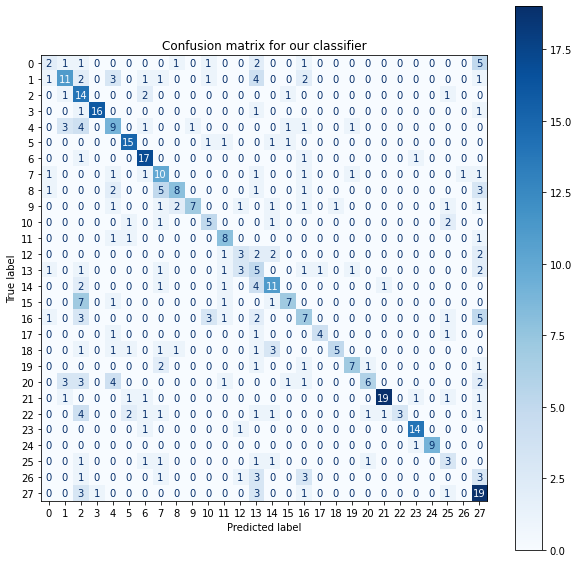

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
clf = KNeighborsClassifier(n_neighbors=5, algorithm="kd_tree")
clf.fit(train_x, train_y)
preds = clf.predict(test_x)
acc = accuracy_score(test_y, preds)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, preds)))
print('Weighted Precision: {:.2f}'.format(precision_score(test_y, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, preds, average='weighted')))
conf_mat = confusion_matrix(test_y, preds)


Accuracy: 0.52

Weighted Precision: 0.58
Weighted Recall: 0.52
Weighted F1-score: 0.53


In [18]:
print(acc)

0.5210970464135021


In [19]:
print(preds)

[ 3  6  0 20  0  1  3  0 18 13  4  2 21  2 10  1 10 19 26  3  6  2  1  1
  5  3  1 10  9 26 21  6 17 23 18 11 19  2 26 21 27  4  4 12  6  1  2  2
  4 23  1  1 20  0  0  5 21  8  0 15  7  2 12 27  3 16 27  7 27 21 24 10
  1  3  1  6  2 21 12  7 16  2 23 12  1  6  4  1  0 27  0  4  4 17  8 19
 25  7  0 11 14  1 15  6 13  6 21 22  2 15  1  5  5  9  6 11  1 26  2  5
  8  2 16 12  0  7 21  9  2  7  5  2  0  9 14  2 27  4  1 21 27  0 27  4
 26 13 26 23 18 10  5 23  4  0  5 27 12 23  3 27 27 27  0  0 24  0  9  2
  7  6  2 24  1 13  2  1 11 17  2 14 26  1 11 14 22  9 27 17 21  3  9 10
 22 20  7 27  8  6 17  2 25  4  7  7  0  0 15  8  2  9  0  0 13 20 27 12
  9  5 14 23 12  4 10 21  2  2 13  4  7  7  6  2 11 16 14 10  0 22  2 14
  0  1  0 22  7 19  2 20 27 24 22  6  5  2  4  0 18  5  6  0 13 18  8  5
 14  6 26  0 14 26 21  6  3 20 26  6 16 20 10 24 16 21  1  7  7 10 16 27
 21 21 24 19  4  3  7  3 11  6 16 21 27  0  7  7 23 17 24 23  0  6 14 19
 16 27 11 19  2 16 19  4  7 27  6  0  4 14 15 17 16

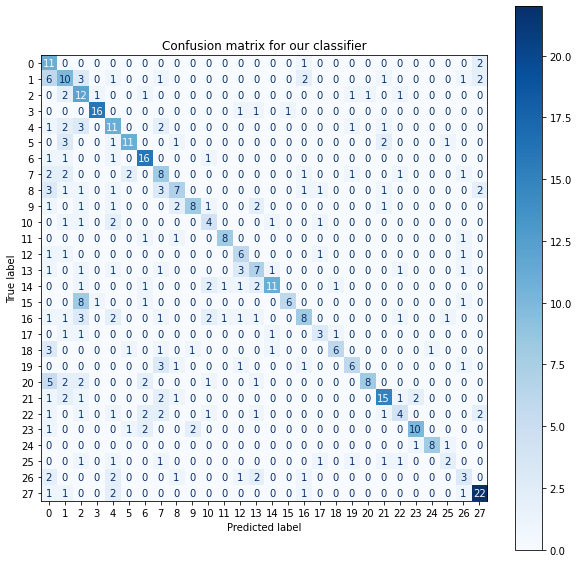

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [22]:
clf = RandomForestClassifier(max_depth=20, random_state=42)

In [23]:
clf.fit(train_x, train_y)
preds = clf.predict(test_x)
acc = accuracy_score(test_y, preds)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, preds)))
print('Weighted Precision: {:.2f}'.format(precision_score(test_y, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, preds, average='weighted')))
conf_mat = confusion_matrix(test_y, preds)
print(acc)


Accuracy: 0.49

Weighted Precision: 0.56
Weighted Recall: 0.49
Weighted F1-score: 0.46
0.4873417721518987


In [24]:
print(preds)

[ 3  6 27 20  1  5  3  0  5 26  4 10 11  2 10  2  5  7 16  3  6 13  7  1
  5  3  1 10 23 17 21  6 12 23 13 11  7  2 16 21 27  4 16 12  6  7  2 15
 11 24  1  4  1 27  0  1 21 16  2 15 12  2 13  1  3 27 27  6  2 21 24 23
  7  3  4  6  6 21 26  7 27  2 23 12  7  6 13  5  0  6  1  5  7 17 11  2
 24 19 16 11 14  7 15  6 14  6 21 21  2  4  4  5  5  9  6 14  6 27  2  5
  8 15 27 12 21  9 21  9  2  7  5  2  2 23 14 27 27  7  6 21  4  0 27  6
 27  7 27 23 14  2  5 23  1  7  5 27 13 23  3 10 27 27 21  8  5  6 25 15
  1 11  2 24  1 13  6  7 11 27 14 14 13 27 11 17  6  9 27 13 11  3 14 13
  6  2 21 27  2  6 12  2  1  4 27 21 27  7 15  8 15  9  2  4 12  8 27 12
  9  5 14  5 12  4 12 21  2 16 14 27 14  6  6  3 11 16 17 23  1  8  2 14
  0 12 13 21 21 19  2  2 27 24 21  6  5  2  4  7 13 23 13  2 13 14 19  5
 14  5  8 26 14 17  4  6  3  4 12 10 27  2 12 11 27 21  1 12  4 10 19 27
  7 11 24 26  0  3 21  3 11  6  8  7 27 16  7 14 23 14 24 23 25  6 14  1
 16 12 12  3  2  7  5  4  9 27  4 26 24 14 15 17 16

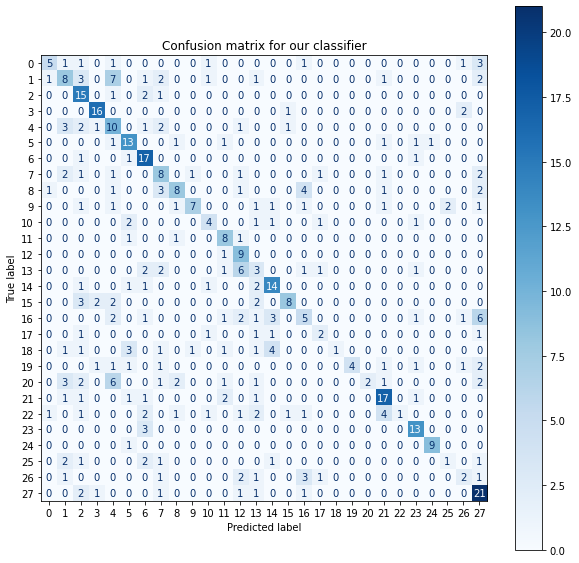

In [25]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
clf = GaussianNB()

In [28]:
clf.fit(train_x, train_y)
preds = clf.predict(test_x)
acc = accuracy_score(test_y, preds)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, preds)))
print('Weighted Precision: {:.2f}'.format(precision_score(test_y, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, preds, average='weighted')))
conf_mat = confusion_matrix(test_y, preds)
print(acc)


Accuracy: 0.34

Weighted Precision: 0.38
Weighted Recall: 0.34
Weighted F1-score: 0.32
0.339662447257384


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
print(preds)

[15  6 27 20  1  5  3  1  5 27  5 25 14 15 12  2  5 25 27  5  6 17 23 20
  5  3  1 27 23 17 21  5 12 23 12 27 21  4 12 25  9  4 27 17  6 21 23 15
 17 24 27 15  1 27  0  4 25  8 27 15 12  1 17 27  3 27 27  6 15 21 24 23
 27  3 25  6 20 25 27  7 27 15 23 12 22 21 12  4  8 20 27  5  5 17 17 27
 25 20  8 11 14  2 15 21 25 20 21 21 15  4 23 25  5  9  6 21  7 27 27 25
 25 15 27 12  1  9 21  1 27  1  5 20 15 23 14 26 27  5 14 21  4 27 27 17
 27 19 27 23 17 17  5 23 20  7  5 20 12 23  3 12  8 27  1 27 24 25 25 27
 27 20 27 24  1 27  7 25 11 12 17 14 17 27 11 17  6  9 27 12 21  3 17 17
  6  2 22 27  8  6 12 27 25 21 16 20 27  0 15 27 27 27 27 27 12  1 27 12
  9  5 14 24 12  5 12 21 15 27 11 27 21 25  6 27 11  9 17 23 27  1 15 14
 27 27 12  5 20 25 27  3 27 24 21  6  5 20  4 27 12 23 17 27 17 25 27  5
 14  5 27 12 17 17  7  6  3 20 27 20 27 27 12 18 27 21 17 17 25 12 27 27
  7 17  5 12 22  3 25  3 12 24  8 19 12 27 23  5 23 17 24 23 17 23 14 21
 27 12 12  4 15  7 21  5  7 27 15 12  5 14 15 17 27

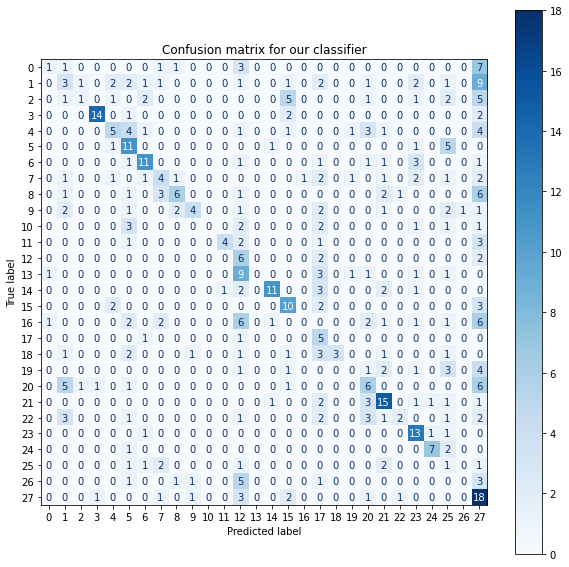

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression(random_state = 42, max_iter=20)

In [33]:
clf.fit(train_x, train_y)
preds = clf.predict(test_x)
acc = accuracy_score(test_y, preds)
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_y, preds)))
print('Weighted Precision: {:.2f}'.format(precision_score(test_y, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_y, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_y, preds, average='weighted')))
conf_mat = confusion_matrix(test_y, preds)
print(acc)


Accuracy: 0.53

Weighted Precision: 0.54
Weighted Recall: 0.53
Weighted F1-score: 0.53
0.5337552742616034


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
print(preds)

[ 3  6 13 20 26 10  3  8 18 27  4 21 11  4 10  1  9  7 26  3  6 21  0  4
  5  3  1 10 23 21 21  6 11 23 18 11  7  2 26 21 27  4 27 17  6  8  2 15
 13 24 12  7  1 27  0 27  1 16  2 15  4  2 17  1  3 26 27 24 10 21 24 21
  7  3 15  6  2 25  0  1 27 15 23 11  8  6  6  5 26 10  0 25  0 17 21  2
 24 19  0 11 14  2 15  6 18 22 21 21  4 15  4  5  5  9  6 11 16 27  2  5
 18 15 27 12  7  9 21 19  2  7  5  2  4 23 14 27 16 19 10 21  4  1 27 10
 19 13 26 23 18 14  5 23 20  7  5 27 16 21  3  0 16  8 21  8 24 14 18  2
  4 20  4 24  1 27  8  4 11 27 14 14 13 20 11 17  6  9 27 13 20  3 18  1
 23  2  8  9  9  6 27  8 25  4 16 21 27  8 15  8 25  9  1  1 27  7 27 12
  9  5 14 25 12  4 10 21  2  8 18 26 16 13  6  5 11 26 17  6 20 21 15 14
 27  8 26 22 21 19  2  2  8 24 22  6  5  9  4  4 11 23 11  8 27 18 16  5
 14 11 27  0 18 18 19 23  3  4 22  6  8 20  2 12 26 21  1 18 19  0  7 27
  9 21 24 16 22  3 25  3 11 23 27 19 16 19  2 14 23 14 24 23  4  6 14 20
  4 27 11 15 15 16 19  4 27 27  1 16  5 14 15 18 27

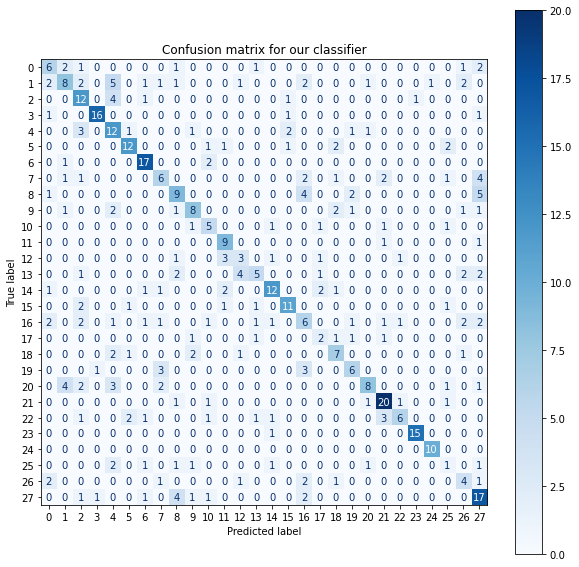

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))
matrix = plot_confusion_matrix(clf, test_x, test_y,
                                 cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()